In [5]:
import importlib
import terrain
import wind
importlib.reload(terrain)
importlib.reload(wind)

<module 'wind' from '/media/afriesinger/Volume/Projekte/Gleitschirmfliegen/Studium/Programming/SciProFinal/era5vis-main/era5vis/wind.py'>

In [6]:
# Load terrain aspect dataset (pre-computed 1km)
terrain_ds = terrain.load_terrain_aspect_dataset()
terrain_ds

Loaded terrain aspect dataset: 232 x 772


<xarray.Dataset> Size: 6MB
Dimensions:       (latitude: 232, longitude: 772)
Coordinates:
  * latitude      (latitude) float64 2kB 48.0 47.99 47.97 ... 45.03 45.01 45.0
  * longitude     (longitude) float64 6kB 6.0 6.013 6.026 ... 15.97 15.99 16.0
Data variables:
    elevation     (latitude, longitude) float64 1MB ...
    aspect        (latitude, longitude) float64 1MB ...
    aspect_deg    (latitude, longitude) float64 1MB ...
    slope         (latitude, longitude) float64 1MB ...
    terrain_mask  (latitude, longitude) bool 179kB ...
Attributes:
    resolution_m:   990
    min_elevation:  500.0
    min_slope:      1.0
    description:    Terrain slope aspect dataset computed from SRTM data

In [7]:
# Load ERA5 example dataset
import xarray as xr
era5_path = "./data/era5_example_dataset.nc"
era5_data = xr.open_dataset(era5_path)
print(era5_data)
print(f"\nVariables: {list(era5_data.data_vars)}")

<xarray.Dataset> Size: 27MB
Dimensions:         (valid_time: 10, pressure_level: 5, latitude: 161,
                     longitude: 281)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 80B 2025-10-01 ... 2025-10-05...
  * pressure_level  (pressure_level) float64 40B 925.0 850.0 700.0 500.0 300.0
  * latitude        (latitude) float64 1kB 70.0 69.75 69.5 ... 30.5 30.25 30.0
  * longitude       (longitude) float64 2kB -20.0 -19.75 -19.5 ... 49.75 50.0
    number          int64 8B ...
    expver          (valid_time) <U4 160B ...
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 9MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:        

In [8]:
# Step 1: Add terrain intersection to ERA5 data
era5_with_terrain = terrain.compute_terrain_intersection(era5_data, terrain_ds)
era5_with_terrain

ERA5 domain: lat(30.0, 70.0), lon(-20.0, 50.0)
Terrain elevation range on ERA5 grid: -32084m to 2787m

Terrain intersection summary:
   925 hPa: mean height ~  835m,   165/45241 (  0.4%) below terrain
   850 hPa: mean height ~ 1533m,    56/45241 (  0.1%) below terrain
   700 hPa: mean height ~ 3103m,     0/45241 (  0.0%) below terrain
   500 hPa: mean height ~ 5712m,     0/45241 (  0.0%) below terrain
   300 hPa: mean height ~ 9352m,     0/45241 (  0.0%) below terrain


<xarray.Dataset> Size: 39MB
Dimensions:              (valid_time: 10, pressure_level: 5, latitude: 161,
                          longitude: 281)
Coordinates:
  * valid_time           (valid_time) datetime64[ns] 80B 2025-10-01 ... 2025-...
  * pressure_level       (pressure_level) float64 40B 925.0 850.0 ... 300.0
  * latitude             (latitude) float64 1kB 70.0 69.75 69.5 ... 30.25 30.0
  * longitude            (longitude) float64 2kB -20.0 -19.75 ... 49.75 50.0
    number               int64 8B ...
    expver               (valid_time) <U4 160B ...
Data variables:
    z                    (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    u                    (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    v                    (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    terrain              (valid_time, pressure_level, latitude, longitude) bool 2MB ...
    terrain_elevation    (latitude, longitude) float64 362kB nan nan ... nan nan
    geopotential_height  (valid_time, pressure_level, latitude, longitude) float32 9MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-05T10:28 GRIB to CDM+CF via cfgrib-0.9.1...

In [9]:
# Step 2: Add wind-terrain interaction
era5_enhanced = wind.compute_wind_terrain_interaction(era5_with_terrain, terrain_ds)
era5_enhanced

<xarray.Dataset> Size: 84MB
Dimensions:              (valid_time: 10, pressure_level: 5, latitude: 161,
                          longitude: 281)
Coordinates:
  * valid_time           (valid_time) datetime64[ns] 80B 2025-10-01 ... 2025-...
  * pressure_level       (pressure_level) float64 40B 925.0 850.0 ... 300.0
  * latitude             (latitude) float64 1kB 70.0 69.75 69.5 ... 30.25 30.0
  * longitude            (longitude) float64 2kB -20.0 -19.75 ... 49.75 50.0
    number               int64 8B ...
    expver               (valid_time) <U4 160B ...
Data variables:
    z                    (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    u                    (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    v                    (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    terrain              (valid_time, pressure_level, latitude, longitude) bool 2MB ...
    terrain_elevation    (latitude, longitude) float64 362kB nan nan ... nan nan
    geopotential_height  (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    slope_aspect         (latitude, longitude) float64 362kB nan nan ... nan nan
    wind_speed           (valid_time, pressure_level, latitude, longitude) float32 9MB ...
    perpendicular_wind   (valid_time, pressure_level, latitude, longitude) float64 18MB ...
    parallel_wind        (valid_time, pressure_level, latitude, longitude) float64 18MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-05T10:28 GRIB to CDM+CF via cfgrib-0.9.1...

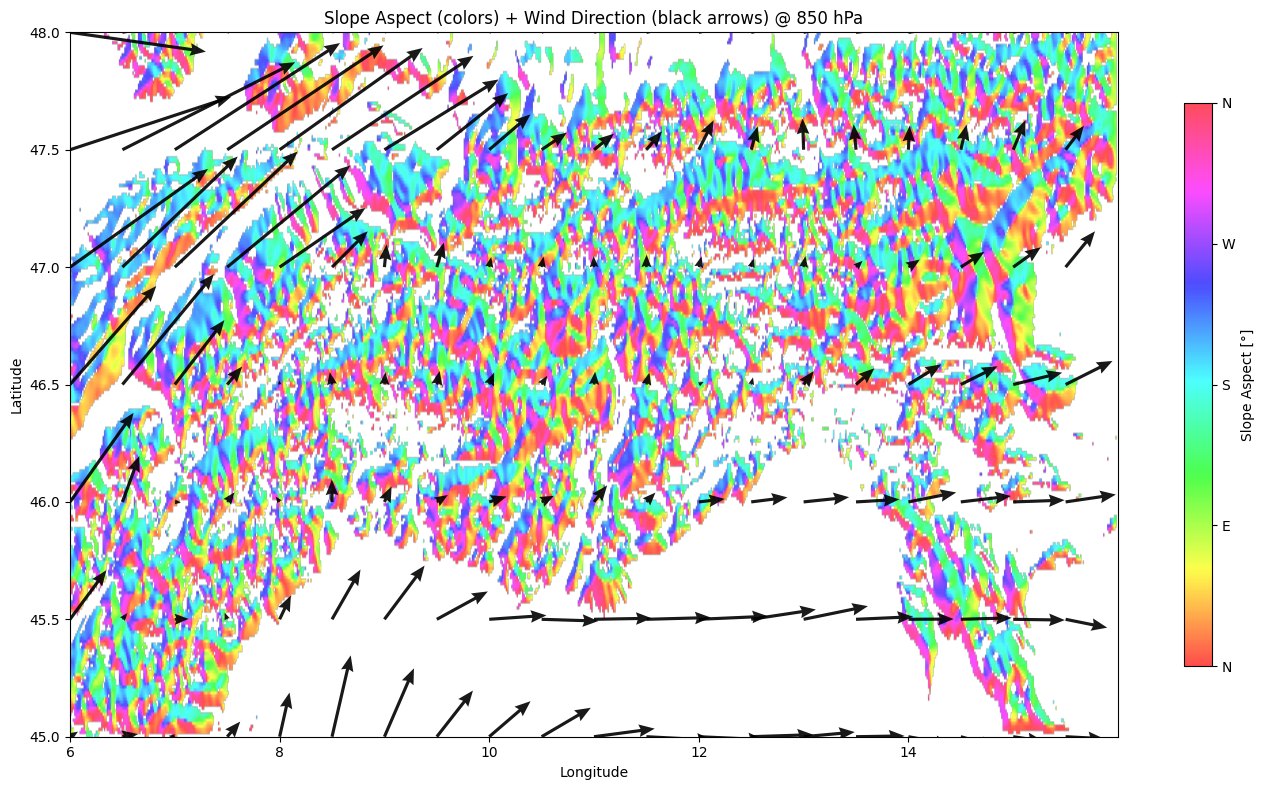


Mean wind: u=6.6 m/s, v=3.9 m/s
Mean wind direction: 239° (coming FROM)
Note: This ERA5 example has mostly westerly winds. South winds would better show perpendicular flow to N-facing slopes.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Select one time and pressure level for visualization
time_idx = 7  # WSW wind @ 7.6 m/s
plev = 850  # hPa

# Crop ERA5 to terrain extent
terrain_lats = terrain_ds.latitude.values
terrain_lons = terrain_ds.longitude.values
lat_min, lat_max = terrain_lats.min(), terrain_lats.max()
lon_min, lon_max = terrain_lons.min(), terrain_lons.max()

# Select ERA5 data within terrain bounds
era5_crop = era5_enhanced.sel(
    latitude=slice(lat_max, lat_min),  # ERA5 lats are decreasing
    longitude=slice(lon_min, lon_max)
)

# Get data
aspect_deg = terrain_ds['aspect_deg'].values
terrain_mask = terrain_ds['terrain_mask'].values

# Wind at selected level
u = era5_crop['u'].isel(valid_time=time_idx).sel(pressure_level=plev).values
v = era5_crop['v'].isel(valid_time=time_idx).sel(pressure_level=plev).values
era5_lats = era5_crop.latitude.values
era5_lons = era5_crop.longitude.values

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot terrain aspect as background (masked to valid terrain)
aspect_masked = np.where(terrain_mask, aspect_deg, np.nan)
im = ax.imshow(aspect_masked, 
               extent=[terrain_lons[0], terrain_lons[-1], terrain_lats[-1], terrain_lats[0]], 
               cmap='hsv', vmin=0, vmax=360, aspect='auto', alpha=0.7)
cbar = plt.colorbar(im, ax=ax, label='Slope Aspect [°]', ticks=[0, 90, 180, 270, 360], shrink=0.8)
cbar.ax.set_yticklabels(['N', 'E', 'S', 'W', 'N'])

# Add wind arrows (quiver) in BLACK - subsample for clarity
skip = 2  # Plot every 2nd arrow
lon_grid, lat_grid = np.meshgrid(era5_lons[::skip], era5_lats[::skip])
u_sub = u[::skip, ::skip]
v_sub = v[::skip, ::skip]

ax.quiver(lon_grid, lat_grid, u_sub, v_sub,
          color='black', scale=150, width=0.003, alpha=0.9,
          headwidth=4, headlength=5)

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Slope Aspect (colors) + Wind Direction (black arrows) @ {plev} hPa')

plt.tight_layout()
plt.show()

# Show wind statistics
mean_u = np.nanmean(u)
mean_v = np.nanmean(v)
wind_dir_deg = (np.degrees(np.arctan2(-mean_u, -mean_v)) + 360) % 360
print(f"\nMean wind: u={mean_u:.1f} m/s, v={mean_v:.1f} m/s")
print(f"Mean wind direction: {wind_dir_deg:.0f}° (coming FROM)")
print("Note: This ERA5 example has mostly westerly winds. South winds would better show perpendicular flow to N-facing slopes.")

In [12]:
# Check wind direction for all time steps
print("Wind direction by time step (coming FROM):")
for t in range(len(era5_crop.valid_time)):
    u_t = era5_crop['u'].isel(valid_time=t).sel(pressure_level=plev).values
    v_t = era5_crop['v'].isel(valid_time=t).sel(pressure_level=plev).values
    mean_u = np.nanmean(u_t)
    mean_v = np.nanmean(v_t)
    wind_dir = (np.degrees(np.arctan2(-mean_u, -mean_v)) + 360) % 360
    speed = np.sqrt(mean_u**2 + mean_v**2)
    time_str = str(era5_crop.valid_time.values[t])[:16]
    print(f"  {t}: {time_str} - {wind_dir:5.0f}° @ {speed:.1f} m/s")

Wind direction by time step (coming FROM):
  0: 2025-10-01T00:00 -    59° @ 2.7 m/s
  1: 2025-10-01T12:00 -    48° @ 4.4 m/s
  2: 2025-10-02T00:00 -    57° @ 5.3 m/s
  3: 2025-10-02T12:00 -    40° @ 4.3 m/s
  4: 2025-10-03T00:00 -    48° @ 3.4 m/s
  5: 2025-10-03T12:00 -     4° @ 1.4 m/s
  6: 2025-10-04T00:00 -   269° @ 2.7 m/s
  7: 2025-10-04T12:00 -   239° @ 7.7 m/s
  8: 2025-10-05T00:00 -   265° @ 6.7 m/s
  9: 2025-10-05T12:00 -   312° @ 3.2 m/s
